# Setup

## Imports and definitions

In [2]:
import sys

sys.executable


'/home/pia/Documents/KD_Lib/kd_venv/bin/python'

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [4]:
import seaborn as sns
sns.set_theme()
sns.set_palette('bright')
sns.set(rc={'figure.figsize': (11.7, 8.27)})  # landscape A4
# The four preset contexts, in order of relative size, are paper, notebook, talk, and poster
# sns.set_context("notebook")


In [5]:
def preprocess_df(df):
    df = df.iloc[2:]
    df = df.apply(pd.to_numeric)
    df = df.reset_index(drop=True)
    return df


In [6]:
def create_plotting_df(df, col_list):
    new_df = pd.DataFrame()

    for col_name in col_list:
        means = np.array(df[col_name])
        sigmas = np.array(df[str(col_name + ".1")])

        lower_bound = means - sigmas
        upper_bound = means + sigmas

        new_df[col_name] = means
        new_df[str(col_name + "_std")] = sigmas
        new_df[str(col_name + "_lower")] = lower_bound
        new_df[str(col_name + "_upper")] = upper_bound

    return new_df


def plot_df(df, col_list, label_list, ax=None):
    plotting_df = create_plotting_df(df, col_list)

    for idx, col_name in enumerate(col_list):
        ax = sns.lineplot(data=plotting_df, x=plotting_df.index,
                          y=plotting_df[col_name], ax=ax, label=label_list[idx])
        plt.fill_between(plotting_df.index, plotting_df[str(
            col_name + "_lower")], plotting_df[str(col_name + "_upper")], alpha=.2)

    return ax


## Read and pre-process DataFrames

In [27]:
vanilla_df = pd.read_csv("Experiments/super_convergence0/vanilla.csv")
dml_df = pd.read_csv("Experiments/calibration4/dml.csv")
dmle_df = pd.read_csv("Experiments/calibration4/dml_e.csv")
tfkd_df = pd.read_csv("Experiments/super_convergence0/tfkd.csv")
ce_df = pd.read_csv("Experiments/calibration2/ce.csv")
kld_df = pd.read_csv("Experiments/calibration2/kld.csv")


In [9]:
vanilla_df = preprocess_df(vanilla_df)
dml_df = preprocess_df(dml_df)
dmle_df = preprocess_df(dmle_df)
tfkd_df = preprocess_df(tfkd_df)
# ce_df = preprocess_df(ce_df)
# kld_df = preprocess_df(kld_df)


In [10]:
keep_vanilla = ["Accuracy/Validation teacher", "Accuracy/Validation student"]
labels_vanilla = ["KD Teacher", "KD Student"]

keep_dml = [] # ["Accuracy/Validation student0", "Accuracy/Validation student1", "Accuracy/Validation student2"]
labels_dml = [] # ["Student 1", "Student 2", "Student 3"]
for i in range(3):
    keep_dml.append("Accuracy/Validation student{}".format(i))
    labels_dml.append("Student {}".format(i+1))



# Plotting with seaborn
## Validation accuracy

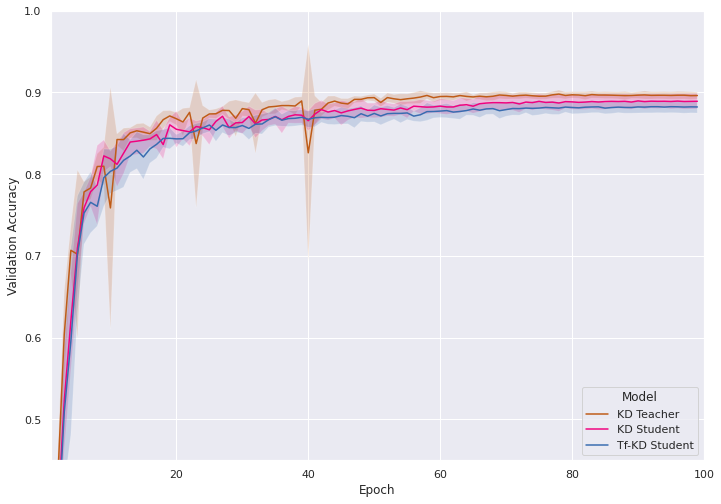

In [11]:
sns.set_palette('Accent_r')

ax = plot_df(vanilla_df, keep_vanilla, labels_vanilla)
ax = plot_df(tfkd_df, [keep_vanilla[1]], ["Tf-KD Student"], ax=ax)
# ax = plot_df(dml_df, keep_dml, ax=ax)
ax.set(xlabel='Epoch', ylabel='Validation Accuracy')
ax.set_ylim(0.45, 1)
ax.set_xlim(1, 100)
ax.legend(title='Model', loc='lower right')  # bbox_to_anchor=[1.2,1.0]


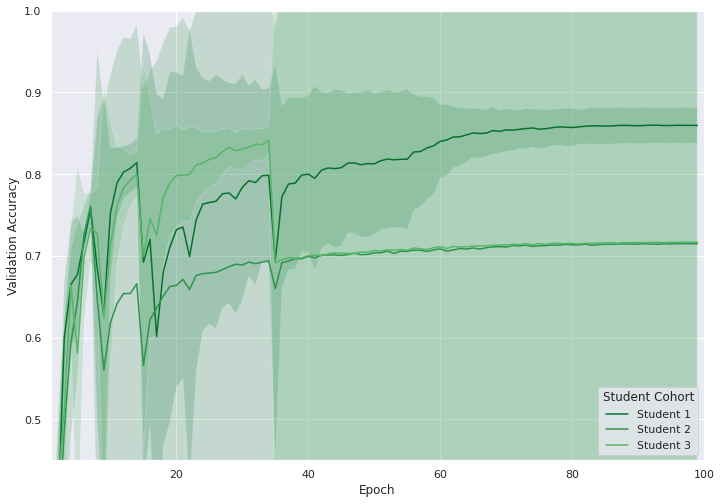

In [12]:
sns.set_palette('Greens_r')
ax = plot_df(dml_df, keep_dml, labels_dml)

ax.set(xlabel='Epoch', ylabel='Validation Accuracy')
ax.set_ylim(0.45, 1)
ax.set_xlim(1, 100)
# bbox_to_anchor=[1.2,1.0]
ax.legend(title='Student Cohort', loc='lower right')


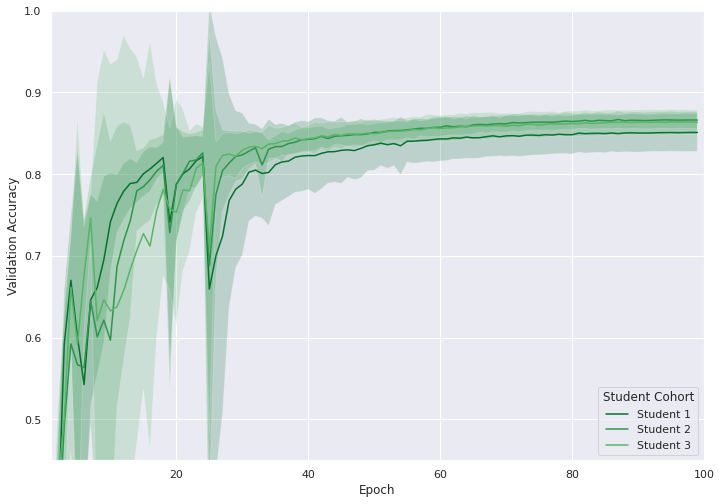

In [13]:
ax = plot_df(dmle_df, keep_dml, labels_dml)
ax.set(xlabel='Epoch', ylabel='Validation Accuracy')

ax.set_ylim(0.45, 1)
ax.set_xlim(1, 100)
# bbox_to_anchor=[1.2,1.0]
ax.legend(title='Student Cohort', loc='lower right')


## Loss functions

In [14]:
loss_student = ["Loss/Cross-entropy student", "Loss/Divergence student",
                "Loss/Entropy student", "Loss/Calibration student"] # "Loss/Calibration teacher"
loss_dml = ["Loss/Cross-entropy student0", "Loss/Divergence student0", "Loss/Entropy student0", "Loss/Calibration student0",
            "Loss/Cross-entropy student1", "Loss/Divergence student1", "Loss/Entropy student1", "Loss/Calibration student1",
            "Loss/Cross-entropy student2", "Loss/Divergence student2", "Loss/Entropy student2", "Loss/Calibration student2"]

loss_labels = ["Cross-entropy", "Divergence",
               "Entropy", "Calibration"] # "Calibration Teacher"
loss_labels_dml = ["Cross-entropy 1", "Divergence 1", "Entropy 1", "Calibration 1",
                   "Cross-entropy 2", "Divergence 2", "Entropy 2", "Calibration 2",
                   "Cross-entropy 3", "Divergence 3", "Entropy 3", "Calibration 3"]


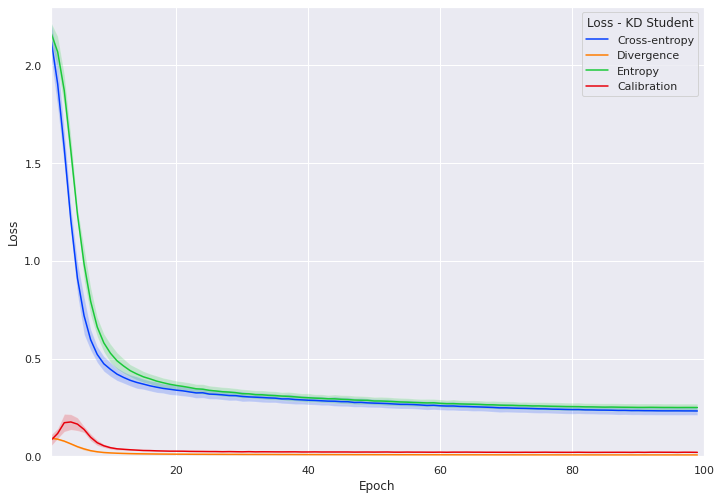

In [15]:
sns.set_palette('bright')

ax = plot_df(vanilla_df, loss_student, loss_labels)
ax.set(xlabel='Epoch', ylabel='Loss')
ax.set_ylim(0.0, 2.3)
ax.set_xlim(1, 100)
ax.legend(title='Loss - KD Student', loc='upper right')


(1.0, 100.0)

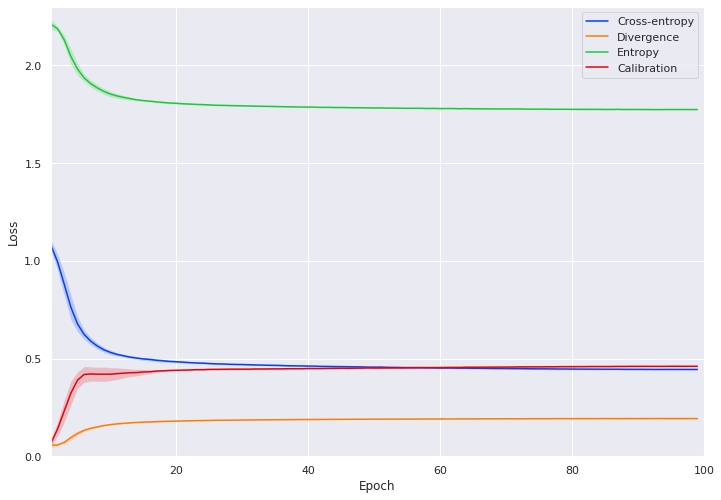

In [16]:
ax = plot_df(tfkd_df, loss_student, loss_labels)
ax.set(xlabel='Epoch', ylabel='Loss')
ax.set_ylim(0.0, 2.3)
ax.set_xlim(1, 100)


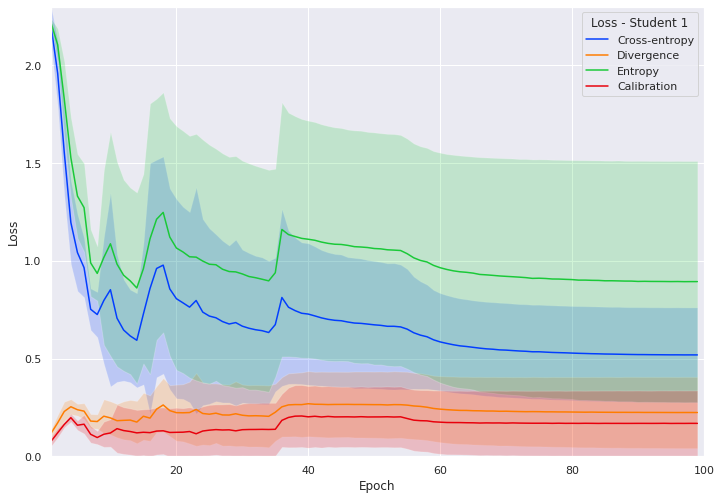

In [17]:
ax = plot_df(dml_df, loss_dml[:4], loss_labels)
ax.set(xlabel='Epoch', ylabel='Loss')
ax.set_ylim(0.0, 2.3)
ax.set_xlim(1, 100)
# bbox_to_anchor=[1.2,1.0]
ax.legend(title='Loss - Student 1', loc='upper right')


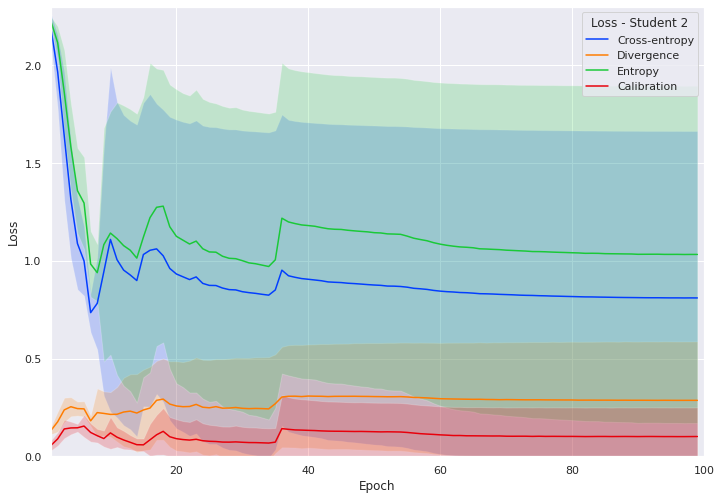

In [18]:
ax = plot_df(dml_df, loss_dml[4:8], loss_labels)
ax.set(xlabel='Epoch', ylabel='Loss')
ax.set_ylim(0.0, 2.3)
ax.set_xlim(1, 100)
# bbox_to_anchor=[1.2,1.0]
ax.legend(title='Loss - Student 2', loc='upper right')


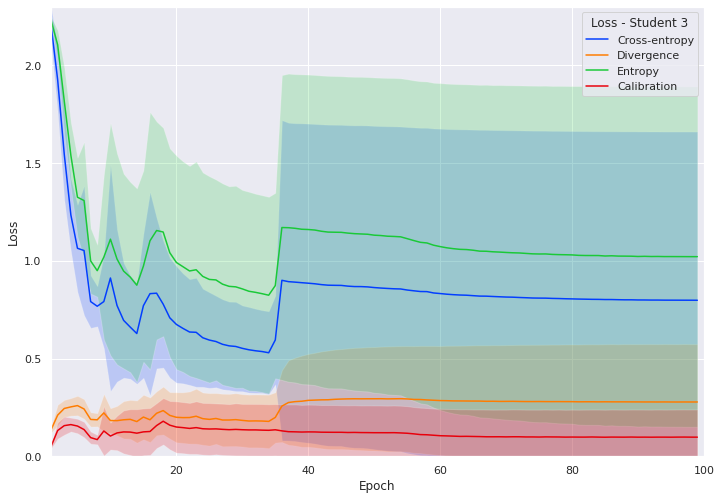

In [19]:
ax = plot_df(dml_df, loss_dml[8:], loss_labels)
ax.set(xlabel='Epoch', ylabel='Loss')
ax.set_ylim(0.0, 2.3)
ax.set_xlim(1, 100)
# bbox_to_anchor=[1.2,1.0]
ax.legend(title='Loss - Student 3', loc='upper right')


## Direct comparisons

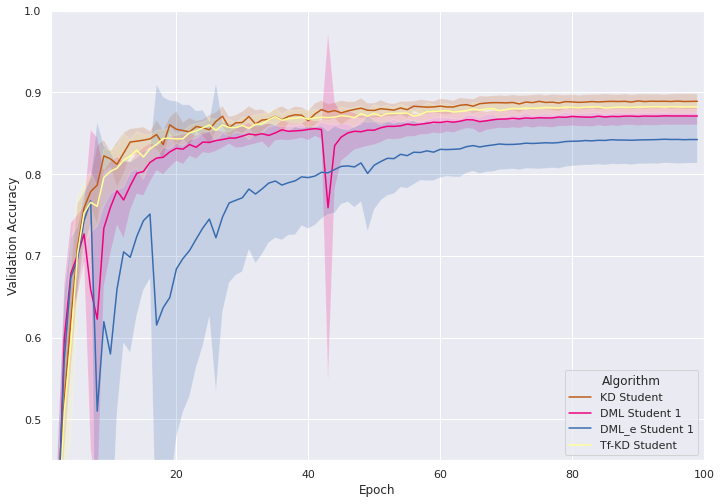

In [20]:
sns.set_palette("Accent_r")

ax = plot_df(vanilla_df, [keep_vanilla[1]], [labels_vanilla[1]])
ax = plot_df(dml_df, [keep_dml[0]], ["DML Student 1"], ax=ax)
ax = plot_df(dmle_df, [keep_dml[0]], ["DML_e Student 1"], ax=ax)
ax = plot_df(tfkd_df, [keep_vanilla[1]], ["Tf-KD Student"], ax=ax)

ax.set(xlabel='Epoch', ylabel='Validation Accuracy')
ax.set_ylim(0.45, 1)
ax.set_xlim(1, 100)
ax.legend(title='Algorithm', loc='lower right')  # bbox_to_anchor=[1.2,1.0]


(1.0, 100.0)

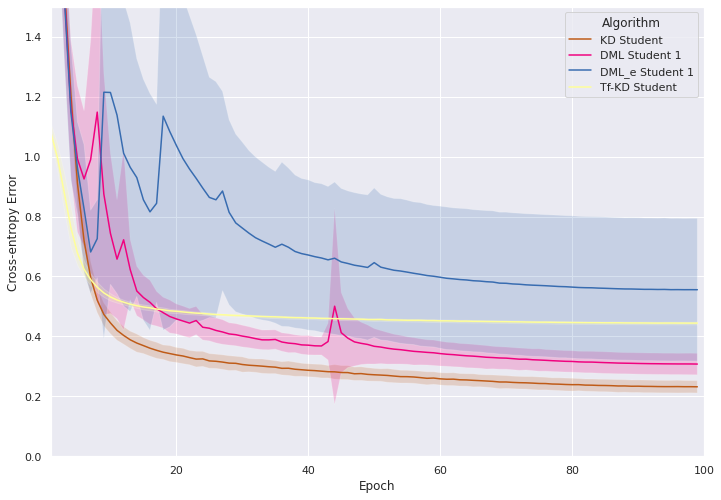

In [21]:
ax = plot_df(vanilla_df, [loss_student[0]], ["KD Student"])
ax = plot_df(dml_df, [loss_dml[0]], ["DML Student 1"], ax=ax)
ax = plot_df(dmle_df, [loss_dml[0]], ["DML_e Student 1"], ax=ax)
ax = plot_df(tfkd_df, [loss_student[0]], ["Tf-KD Student"], ax=ax)

ax.set(xlabel='Epoch', ylabel='Cross-entropy Error')
ax.legend(title='Algorithm', loc='upper right')
ax.set_ylim(0.0, 1.5)
ax.set_xlim(1, 100)


(1.0, 100.0)

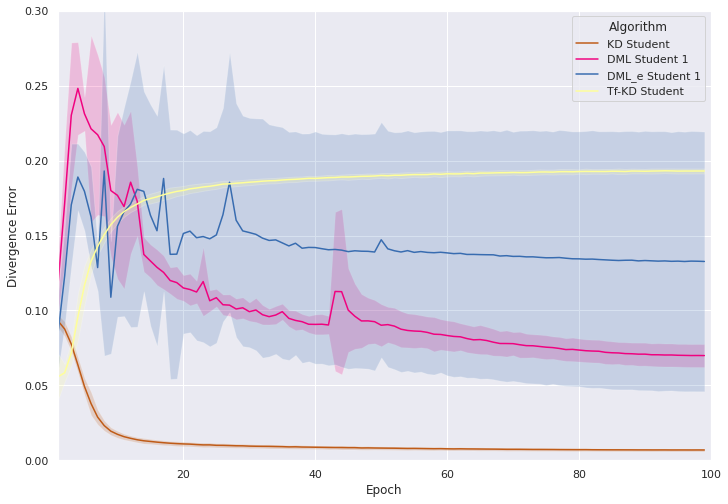

In [22]:
ax = plot_df(vanilla_df, [loss_student[1]], ["KD Student"])
ax = plot_df(dml_df, [loss_dml[1]], ["DML Student 1"], ax=ax)
ax = plot_df(dmle_df, [loss_dml[1]], ["DML_e Student 1"], ax=ax)
ax = plot_df(tfkd_df, [loss_student[1]], ["Tf-KD Student"], ax=ax)

ax.set(xlabel='Epoch', ylabel='Divergence Error')
ax.legend(title='Algorithm', loc='upper right')
ax.set_ylim(0.0, 0.3)
ax.set_xlim(1, 100)


(1.0, 100.0)

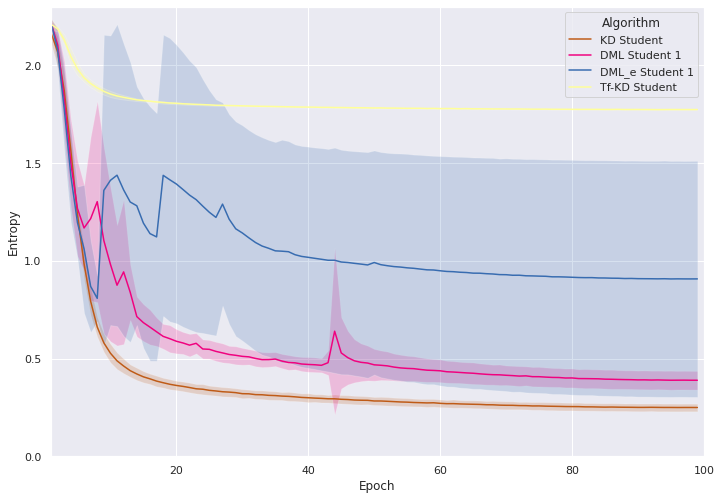

In [23]:
ax = plot_df(vanilla_df, [loss_student[2]], ["KD Student"])
ax = plot_df(dml_df, [loss_dml[2]], ["DML Student 1"], ax=ax)
ax = plot_df(dmle_df, [loss_dml[2]], ["DML_e Student 1"], ax=ax)
ax = plot_df(tfkd_df, [loss_student[2]], ["Tf-KD Student"], ax=ax)

ax.set(xlabel='Epoch', ylabel='Entropy')
ax.legend(title='Algorithm', loc='upper right')
ax.set_ylim(0.0, 2.3)
ax.set_xlim(1, 100)


(1.0, 100.0)

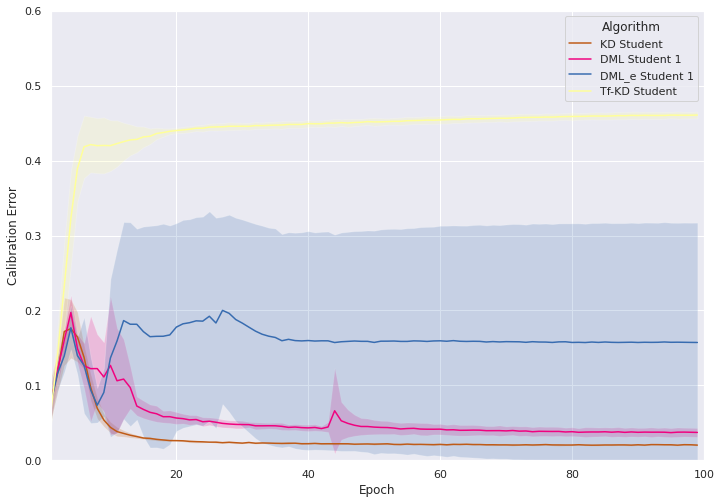

In [24]:
ax = plot_df(vanilla_df, [loss_student[3]], ["KD Student"])
ax = plot_df(dml_df, [loss_dml[3]], ["DML Student 1"], ax=ax)
ax = plot_df(dmle_df, [loss_dml[3]], ["DML_e Student 1"], ax=ax)
ax = plot_df(tfkd_df, [loss_student[3]], ["Tf-KD Student"], ax=ax)

ax.set(xlabel='Epoch', ylabel='Calibration Error')
ax.legend(title='Algorithm', loc='upper right')
ax.set_ylim(0.0, 0.6)
ax.set_xlim(1, 100)


### Miscellaneous

(-1.0, 100.0)

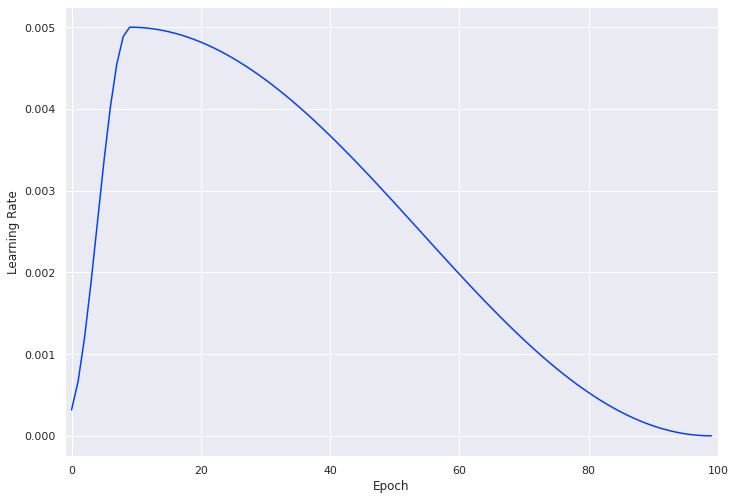

In [25]:
sns.set_palette('bright')

ax = plot_df(vanilla_df, ["Optimizer/lr student"], [""])
ax.set(xlabel='Epoch', ylabel='Learning Rate')
ax.set_xlim(-1, 100)


(1.0, 100.0)

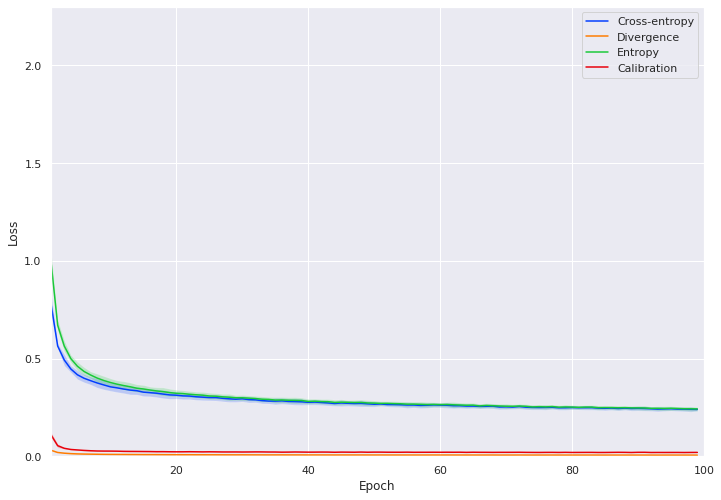

In [28]:
ax = plot_df(ce_df, loss_student, loss_labels)
ax.set(xlabel='Epoch', ylabel='Loss')
ax.set_ylim(0.0, 2.3)
ax.set_xlim(1, 100)


(1.0, 100.0)

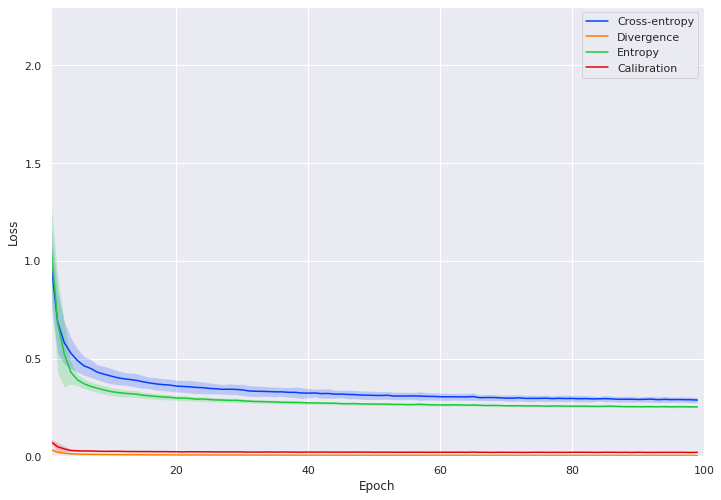

In [29]:
ax = plot_df(kld_df, loss_student, loss_labels)
ax.set(xlabel='Epoch', ylabel='Loss')
ax.set_ylim(0.0, 2.3)
ax.set_xlim(1, 100)


# Plotting for presentations

In [30]:
def softmax(vec):
  exponential = np.exp(vec)
  probabilities = exponential / np.sum(exponential)
  return probabilities

[Text(0.5, 0, 'Class'), Text(0, 0.5, 'Label')]

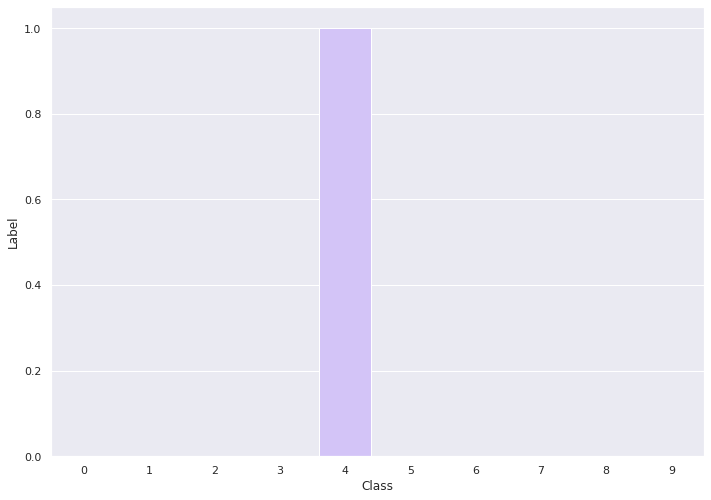

In [45]:
labels = [0, 0, 0, 0, 1, 0, 0, 0, 0, 0]
ax = sns.barplot(x=[i for i in range(10)], y=labels, color=sns.color_palette("pastel")[4])
ax.set(xlabel='Class', ylabel='Label')

In [32]:
import random
# handcrafted = [0.1, 0.1, 0.9, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]
random_dist = [random.uniform(0, 10) for _ in range(10)]

[Text(0.5, 0, 'Class'), Text(0, 0.5, 'Logit')]

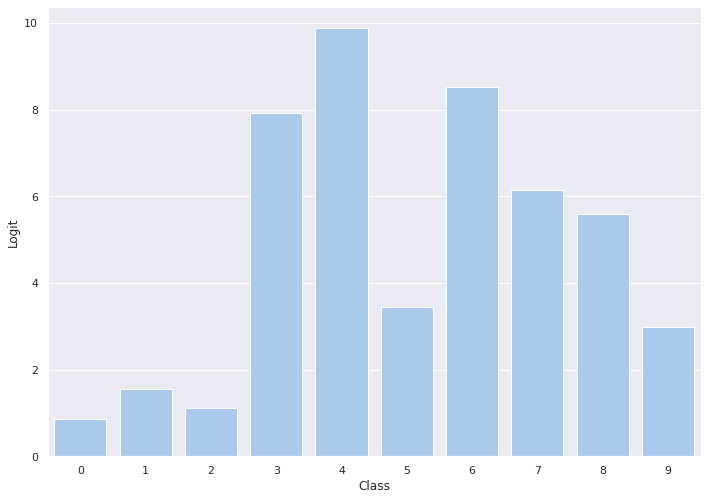

In [33]:
ax = sns.barplot(x=[i for i in range(10)], y=random_dist, color=sns.color_palette("pastel")[0])
ax.set(xlabel='Class', ylabel='Logit')

(0.0, 1.0)

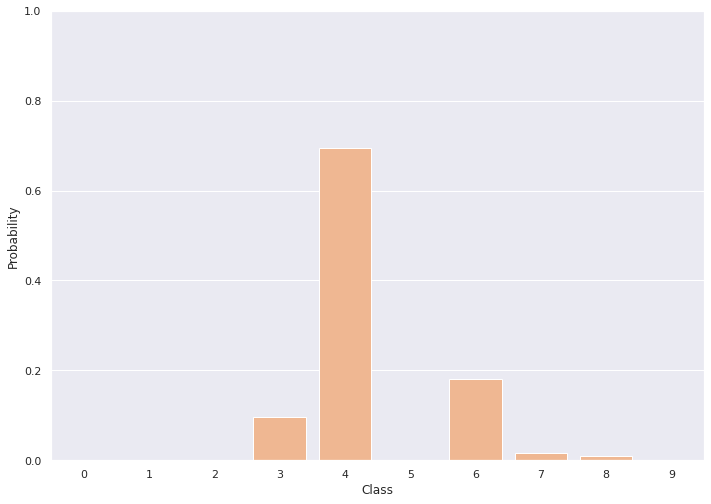

In [34]:
ax = sns.barplot(x=[i for i in range(10)], y=softmax(random_dist), color=sns.color_palette("pastel")[1])
ax.set(xlabel='Class', ylabel='Probability')
ax.set_ylim(0.0, 1.0)

(0.0, 0.5)

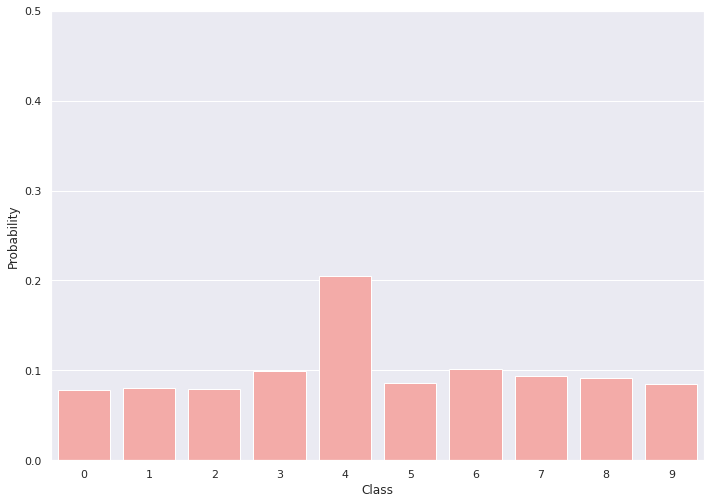

In [36]:
teacher = [random_dist[i] / 3 if i != 4 else random_dist[i] for i in range(10)]
ax = sns.barplot(x=[i for i in range(10)], y=softmax([i/10 for i in teacher]), color=sns.color_palette("pastel")[3])
ax.set(xlabel='Class', ylabel='Probability')
ax.set_ylim(0.0, 0.5)

In [37]:
plot_data = pd.DataFrame()
plot_data["classes"] = [i for i in range(10)]
plot_data["Logits"] = random_dist
plot_data["Softmax"] = softmax(random_dist)
# plot_data["Temperature Smoothing"] = softmax([i/10 for i in random_dist])

In [38]:
melt_plot_data = pd.melt(plot_data, id_vars="classes")
melt_plot_data.head()

,classes,variable,value
0,0,Logits,0.864659
1,1,Logits,1.549721
2,2,Logits,1.119464
3,3,Logits,7.915806
4,4,Logits,9.879880


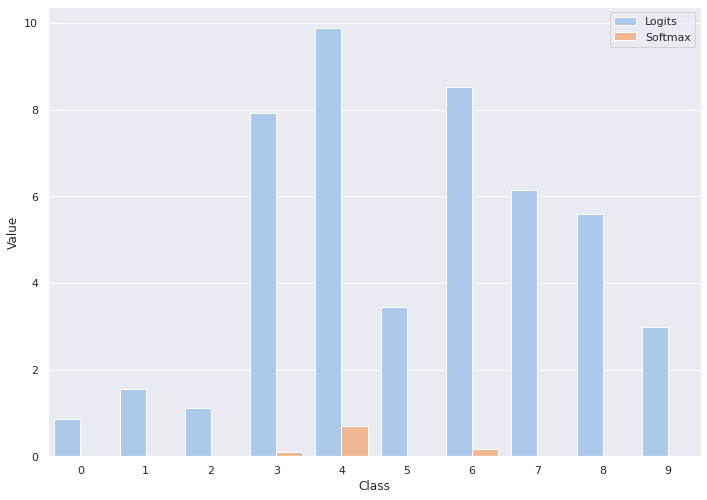

In [39]:
ax = sns.barplot(x="classes", y="value", hue="variable", data=melt_plot_data, palette="pastel")
ax.set(xlabel='Class', ylabel='Value')
ax.legend(title='', loc='upper right')
#ax.set_ylim(0.0, 1.0)

In [40]:
plot_data = pd.DataFrame()
plot_data["classes"] = [i for i in range(10)]
# plot_data["raw"] = random_dist
plot_data["Softmax"] = softmax(random_dist)
plot_data["Temperature Smoothing"] = softmax([i/10 for i in random_dist])

In [41]:
melt_plot_data = pd.melt(plot_data, id_vars="classes")
melt_plot_data.head()

,classes,variable,value
0,0,Softmax,0.000084
1,1,Softmax,0.000167
2,2,Softmax,0.000109
3,3,Softmax,0.097395
4,4,Softmax,0.694259


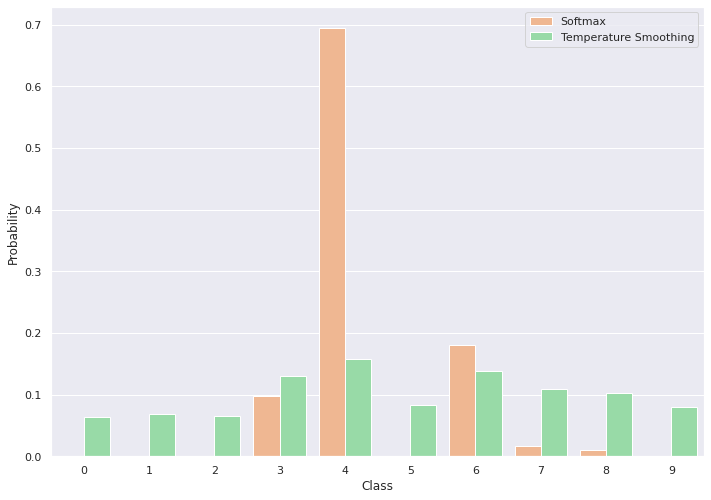

In [42]:
ax = sns.barplot(x="classes", y="value", hue="variable", data=melt_plot_data, palette=sns.color_palette("pastel")[1:])
ax.set(xlabel='Class', ylabel='Probability')
ax.legend(title='', loc='upper right')
#ax.set_ylim(0.0, 1.0)

(0.0, 0.6)

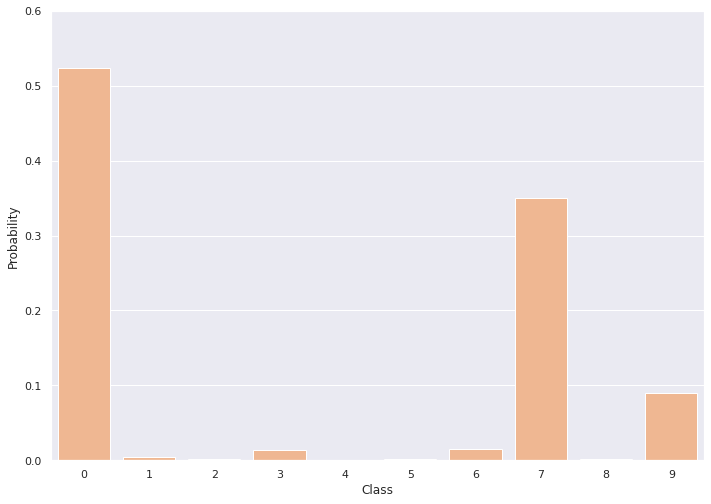

In [43]:
student = [random.uniform(0, 10) for _ in range(10)]
ax = sns.barplot(x=[i for i in range(10)], y=softmax(student), color=sns.color_palette("pastel")[1])
ax.set(xlabel='Class', ylabel='Probability')
ax.set_ylim(0.0, 0.6)

# Previous attempts

In [16]:
summary = pd.DataFrame()
summary["KD teacher"] = vanilla_df[keep_vanilla[0]]
summary["KD student"] = vanilla_df[keep_vanilla[1]]

summary["DML student0"] = dml_df[keep_dml[0]]
summary["DML student1"] = dml_df[keep_dml[1]]
summary["DML student2"] = dml_df[keep_dml[2]]

summary["DMLe student0"] = dmle_df[keep_dml[0]]
summary["DMLe student1"] = dmle_df[keep_dml[1]]
summary["DMLe student2"] = dmle_df[keep_dml[2]]

summary["Tf-KD student"] = tfkd_df[keep_vanilla[1]]


In [17]:
summary


,KD teacher,KD student,DML student0,DML student1,DML student2,DMLe student0,DMLe student1,DMLe student2,Tf-KD student
0,0.13670,0.16162,0.12734,0.14678,0.12460,0.12686,0.14688,0.12528,0.13992
1,0.25738,0.22330,0.20732,0.23140,0.24220,0.20368,0.23178,0.23884,0.24674
2,0.42450,0.37806,0.35434,0.34080,0.41990,0.37500,0.34666,0.41170,0.35770
3,0.60408,0.52332,0.59886,0.48376,0.51460,0.57350,0.47168,0.51822,0.50910
4,0.70694,0.62030,0.67874,0.60196,0.65848,0.67390,0.62320,0.65386,0.59546
...,...,...,...,...,...,...,...,...,...
95,0.89640,0.88900,0.87130,0.86752,0.86592,0.84250,0.68936,0.69612,0.88262
96,0.89664,0.88948,0.87128,0.86748,0.86596,0.84254,0.68940,0.69622,0.88248
97,0.89668,0.88898,0.87130,0.86748,0.86612,0.84224,0.68958,0.69618,0.88218
98,0.89612,0.88912,0.87124,0.86766,0.86608,0.84246,0.68964,0.69616,0.88242


In [16]:
# All the preprocessing is done above now

# summary = summary[summary['KD student'].notna()]
# summary = summary.iloc[1:]
# summary = summary.apply(pd.to_numeric)
# summary = summary.reset_index(drop=True)


In [19]:
# !pip install seaborn


[Text(0.5, 0, 'Epoch'), Text(0, 0.5, 'Validation Accuracy')]

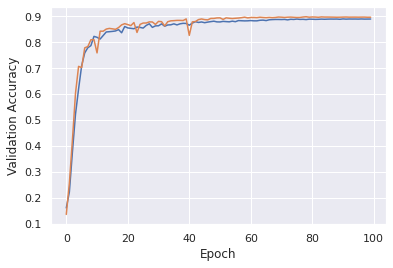

In [31]:
ax = sns.lineplot(data=summary, x=summary.index, y='KD student')
ax = sns.lineplot(data=summary, x=summary.index, y='KD teacher', ax=ax)
ax.set(xlabel='Epoch', ylabel='Validation Accuracy')


## Goal: recreate pandas plot with seaborn

array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>], dtype=object)

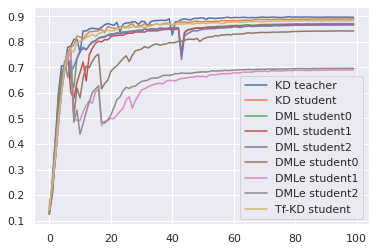

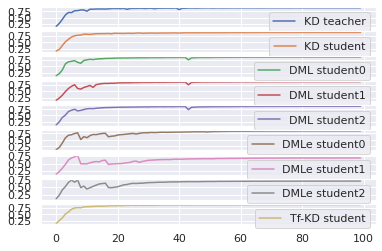

In [23]:
summary.plot.line(subplots=False)
summary.plot.line(subplots=True)


In [25]:
sns_summary = summary.copy()
sns_summary["step"] = range(100)
sns_summary = pd.melt(sns_summary, id_vars='step')
sns_summary.head()


,step,variable,value
0,0,KD teacher,0.13670
1,1,KD teacher,0.25738
2,2,KD teacher,0.42450
3,3,KD teacher,0.60408
4,4,KD teacher,0.70694


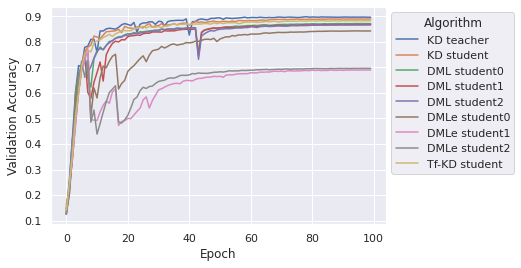

In [30]:
ax = sns.lineplot(data=sns_summary, x='step', y='value', hue='variable')
ax.set(xlabel='Epoch', ylabel='Validation Accuracy')
ax.legend(title='Algorithm', bbox_to_anchor=[1.0, 1.0])


### Success!

# What about statistical significance?

In [26]:
from scipy import stats


In [32]:
# DML and KD
t_stat, p_value = stats.ttest_rel([0.87, 0.86, 0.86, 0.88, 0.88], [
                                  0.87, 0.89, 0.89, 0.89, 0.90])


In [34]:
t_stat, p_value


(-3.086974532565159, 0.03668198940044108)

In [35]:
# DML and DML_e
t_stat, p_value = stats.ttest_rel([0.87, 0.86, 0.86, 0.88, 0.88], [
                                  0.80, 0.83, 0.84, 0.85, 0.89])


In [36]:
t_stat, p_value


(2.1864326664404867, 0.09406601105916962)

In [37]:
# DML and KD
t_stat, p_value = stats.ttest_rel([0.87, 0.88, 0.88, 0.88, 0.89], [
                                  0.87, 0.89, 0.89, 0.89, 0.90])


In [38]:
t_stat, p_value


(-4.0, 0.01613008990009254)